# About The DataSet

Stress detection is a difficult task because there are so many words that people can use in their posts to indicate whether or not a person is experiencing psychological stress. I am available with the dataset of 116 columns in which i have used only text and label column for this task.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r'C:\Users\HP\Downloads\stress.txt')
df.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [3]:
df.tail()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",1713,0,1.000000,1515187044,13,-1.369333,...,1.4000,1.0000,1.0,1.71133,1.45301,2.00304,0.84,16,0.254444,0.552066
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1133,1,1.000000,1539827412,33,9.425478,...,1.0000,1.0000,1.0,1.65003,1.56842,1.81527,0.96,6,8.640664,-0.220370
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,10442,0,1.000000,1539269312,2,11.060675,...,1.1250,1.1250,1.0,1.79768,1.49074,1.92286,1.00,1,9.951524,0.045455
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,1834,0,0.571429,1488938143,4,2.421912,...,1.1111,1.1429,1.0,1.71642,1.57627,1.89972,0.75,7,4.036765,0.159722
2837,ptsd,5y25cl,"[0, 5]",I was talking to my mom this morning and she s...,961,1,0.571429,1488909516,2,0.835254,...,1.0000,1.0000,1.0,1.68891,1.44615,1.89707,0.76,2,2.412000,0.016667


In [4]:
df.sample(5)

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
1320,homeless,6dbr0u,"[0, 5]",I regularly visit a couple tent cities in the ...,1137,0,0.800000,1495739241,13,8.547349,...,1.1250,1.1250,1.0,1.68883,1.71212,1.90986,1.00,21,8.086410,-0.183333
523,anxiety,93kjrt,"(11, 16)",I know that I can't be unemployed forever but ...,10158,1,1.000000,1533087161,41,2.959048,...,1.0000,1.1429,1.0,1.68273,1.31034,1.86720,0.99,11,5.549444,-0.016667
2825,relationships,7qcvxy,"[0, 5]",BACKGROUND: paul and i met 1.5 years ago on ok...,2423,0,0.600000,1515948292,24,10.015826,...,1.0000,1.0000,1.0,1.67216,1.64255,1.87820,0.80,17,9.797391,0.155952
1957,relationships,7rvimh,"[20, 25]","When we got to Food Lion, she got out of the c...",2147,0,0.571429,1516507176,2,2.408106,...,1.1667,1.1250,1.0,1.70963,1.77436,1.92197,0.63,3,3.539280,0.105195
1156,relationships,7t6i8m,"(13, 18)",I know this goes a bit beyond /r/relationships...,52610,1,1.000000,1516991069,21,0.379025,...,1.0000,1.1429,1.0,1.77952,1.50400,1.77047,0.76,22,3.086250,-0.180000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Columns: 116 entries, subreddit to sentiment
dtypes: float64(106), int64(6), object(4)
memory usage: 2.5+ MB


In [6]:
df.describe()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,2838.000000,2838.000000,2838.000000,2.838000e+03,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,...,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000
mean,13751.999295,0.524313,0.808972,1.518107e+09,18.262156,4.684272,85.996124,35.240941,40.948231,67.044249,...,1.088001,1.120099,1.000211,1.722759,1.536400,1.879385,0.843517,9.948555,5.448836,0.040740
std,17340.161897,0.499497,0.177038,1.552209e+07,79.419166,3.316435,32.334887,26.486189,31.587117,32.880644,...,0.117159,0.085227,0.006500,0.047835,0.102971,0.058932,0.174794,21.798032,2.535829,0.195490
min,4.000000,0.000000,0.428571,1.483274e+09,0.000000,-6.620000,5.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.485400,1.200000,1.561150,0.140000,0.000000,-1.918000,-1.000000
25%,926.250000,0.000000,0.600000,1.509698e+09,2.000000,2.464243,65.000000,12.410000,12.135000,41.070000,...,1.000000,1.000000,1.000000,1.691430,1.469745,1.841782,0.750000,2.000000,3.729973,-0.072222
50%,1891.500000,1.000000,0.800000,1.517066e+09,5.000000,4.321886,81.000000,29.420000,33.520000,80.710000,...,1.000000,1.142900,1.000000,1.721430,1.530295,1.878250,0.890000,5.000000,5.210000,0.044821
75%,25473.750000,1.000000,1.000000,1.530898e+09,10.000000,6.505657,101.000000,55.057500,69.320000,96.180000,...,1.142900,1.142900,1.000000,1.751760,1.596030,1.916243,1.000000,10.000000,6.855217,0.166667
max,55757.000000,1.000000,1.000000,1.542592e+09,1435.000000,24.074231,310.000000,99.000000,99.000000,99.000000,...,1.900000,1.500000,1.200000,2.007400,2.066670,2.158490,1.000000,416.000000,21.198919,1.000000


In [7]:
df.shape

(2838, 116)

In [8]:
df.corr()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
id,1.000000,-0.057570,0.198152,-0.004089,0.001155,0.103680,0.057690,0.013110,0.055287,-0.043653,...,0.027462,-0.042197,-0.023827,-0.044492,-0.058451,0.018026,-0.031343,-0.007265,0.100821,0.034676
label,-0.057570,1.000000,0.023831,-0.006504,-0.053421,-0.092786,0.100473,-0.247933,-0.403804,0.275282,...,-0.297439,-0.032659,-0.012440,0.144963,-0.049756,-0.165470,0.097125,-0.038507,-0.058567,-0.305157
confidence,0.198152,0.023831,1.000000,0.029101,-0.035109,0.034465,-0.005430,0.040150,-0.019701,0.030784,...,0.054247,-0.000609,-0.043655,0.019157,-0.064465,0.066168,-0.006815,-0.056471,0.040245,0.018656
social_timestamp,-0.004089,-0.006504,0.029101,1.000000,-0.015673,0.001516,0.013800,0.001789,-0.013092,0.023516,...,-0.001197,-0.002790,-0.024561,-0.006740,0.007107,0.010445,0.009877,-0.024676,0.002347,0.027996
social_karma,0.001155,-0.053421,-0.035109,-0.015673,1.000000,-0.014104,0.008587,-0.032604,0.049560,-0.073504,...,-0.031136,-0.028579,-0.003248,-0.006415,-0.003452,0.007040,0.099256,0.794517,-0.020001,0.004918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lex_dal_avg_pleasantness,0.018026,-0.165470,0.066168,0.010445,0.007040,-0.105369,-0.064109,-0.070831,0.085443,-0.016854,...,0.374458,0.074514,0.016777,0.108321,-0.026838,1.000000,-0.080428,0.012151,-0.078536,0.320488
social_upvote_ratio,-0.031343,0.097125,-0.006815,0.009877,0.099256,-0.006797,-0.017517,-0.060588,-0.100387,0.086029,...,-0.103184,0.008844,0.004309,0.051622,-0.016455,-0.080428,1.000000,0.011538,-0.014422,-0.073087
social_num_comments,-0.007265,-0.038507,-0.056471,-0.024676,0.794517,-0.042912,0.007982,-0.045950,0.055352,-0.083499,...,-0.017950,-0.048020,-0.008879,-0.033903,-0.002724,0.012151,0.011538,1.000000,-0.045006,0.001583
syntax_fk_grade,0.100821,-0.058567,0.040245,0.002347,-0.020001,0.967380,0.564947,0.270828,0.120024,-0.080276,...,-0.132731,-0.176478,-0.005930,0.000508,0.012685,-0.078536,-0.014422,-0.045006,1.000000,0.070168


In [9]:
df.columns

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

In [10]:
df.nunique()

subreddit                     10
post_id                     2343
sentence_range               173
text                        2820
id                          2838
                            ... 
lex_dal_avg_pleasantness    2615
social_upvote_ratio           73
social_num_comments           94
syntax_fk_grade             2417
sentiment                   1809
Length: 116, dtype: int64

In [11]:
df.isnull().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [12]:
df['subreddit'].unique()

array(['ptsd', 'assistance', 'relationships', 'survivorsofabuse',
       'domesticviolence', 'anxiety', 'homeless', 'stress',
       'almosthomeless', 'food_pantry'], dtype=object)

In [13]:
df['subreddit'].value_counts()

ptsd                584
relationships       552
anxiety             503
domesticviolence    316
assistance          289
survivorsofabuse    245
homeless            168
almosthomeless       80
stress               64
food_pantry          37
Name: subreddit, dtype: int64

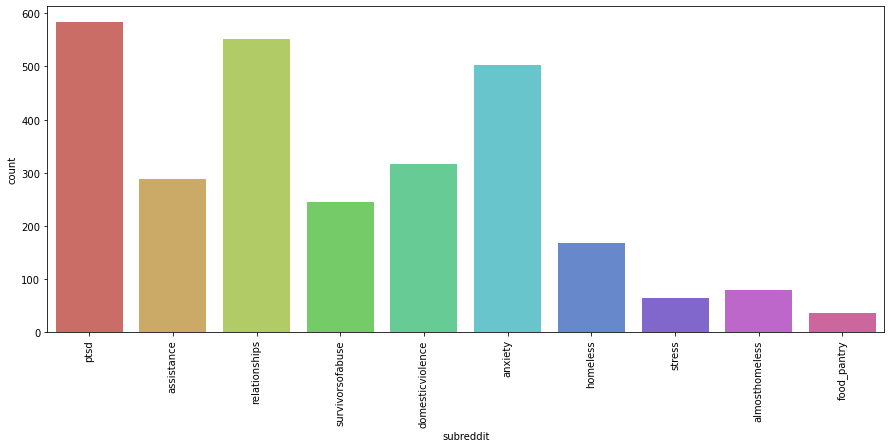

In [14]:
plt.figure(figsize=(15,6))
sns.countplot('subreddit', data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [15]:
df['label'].unique()

array([1, 0], dtype=int64)

In [16]:
df['label'].value_counts()

1    1488
0    1350
Name: label, dtype: int64

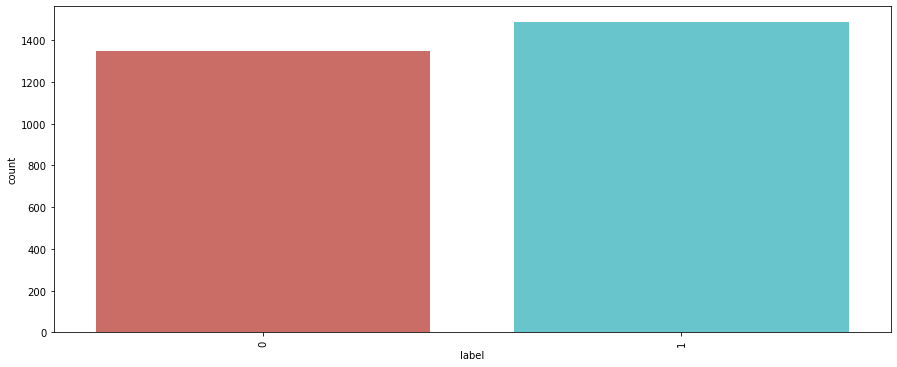

In [17]:
plt.figure(figsize=(15,6))
sns.countplot('label', data = df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [22]:
df["label"] = df["label"].map({0: "No Stress", 1: "Stress"})
df = df[["text", "label"]]
print(df.head())

                                                text      label
0  He said he had not felt that way before, sugge...     Stress
1  Hey there r/assistance, Not sure if this is th...  No Stress
2  My mom then hit me with the newspaper and it s...     Stress
3  until i met my new boyfriend, he is amazing, h...     Stress
4  October is Domestic Violence Awareness Month a...     Stress


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [24]:
x = np.array(df["text"])
y = np.array(df["label"])

In [25]:
cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y,test_size=0.33,random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

In [27]:
model_log = LogisticRegression()
model_log.fit(xtrain, ytrain)


LogisticRegression()

In [28]:
model_log.score(xtrain, ytrain)

0.9994739610731194

In [29]:
model_log.score(xtest, ytest)

0.743863393810032

In [30]:
model_dt = DecisionTreeClassifier()
model_dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [31]:
model_dt.score(xtrain, ytrain)

1.0

In [32]:
model_dt.score(xtest, ytest)

0.6093916755602988

In [33]:
model_rf= RandomForestClassifier(n_estimators= 10,
criterion="entropy")
model_rf.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [34]:
model_rf.score(xtrain, ytrain)

0.9889531825355077

In [35]:
model_rf.score(xtest, ytest)

0.6574172892209178

In [36]:
model = BernoulliNB()
model.fit(xtrain, ytrain)

BernoulliNB()

In [37]:
model.score(xtrain, ytrain)

0.9384534455549711

In [38]:
model.score(xtest, ytest)

0.7577374599786553

In [39]:
user = input("Enter a Text: ")
df = cv.transform([user]).toarray()
output = model_dt.predict(df)
print(output)

Enter a Text: suyash is great word in the world
['No Stress']


# THANK YOU